# **Marketing Campaign for Banking Products**





## The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).  
## Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 

###**Hypothesis Generation**

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the likelihood of a liability customer buying personal loans (dependent variable for this loan prediction problem):

**Salary**: Salary can be one of the major dependent variables as customers with high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.

**The number of family members**: More the number of earning family members, less probability of buying personal loans.

**Age**: Customers with probably the age of 30–50 will buy personal loans.

**Education of the customer**: The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

We will start with importing basic libraries, reading the data into a data frame and figure out the basic shape of our data set:

## 1. **Importing the required libraries and dataset for EDA** 

In [23]:
# Importing the standard libraries
import pandas as pd
import numpy as np                                                        # For mathematical calculations
import seaborn as sns                                                      # For data visualization
import matplotlib.pyplot as plot                                          # For data visualization
%matplotlib inline
import warnings                                                            # To ignore any warnings
warnings.filterwarnings("ignore")


from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy


In [2]:
# Importing files from local drive
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [17]:
# Reading the Data
Data = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx','Data')
display(Data)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# Names of the variables 
print(Data.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


**We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got 5000 rows which can be split into test & train datasets.**

In [ ]:
# Displaying top 10 values of the data 
Data.head(8)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27.0,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24.0,22,93943,1,0.3,3,0,0,0,0,0,1


In [ ]:
# Displaying last 10 values of the data
Data.tail(8)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4992,4993,30,5.0,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21.0,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40.0,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3.0,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4.0,83,92612,3,0.800000,1,0,0,0,0,1,1


## **1.2 Checking the types of data, shapes and basic summary stats**

### **Description of the variables**


### *   ID: Customer ID 
###*    Age: Customer's age in completed years 
###*    Experience: #years of professional experience 
###*     Income: Annual income of the customer
###*    ZIP Code: Home Address ZIP code
###*    Family: Family size of the customer 
###*   CCAvg: Avg. spending on credit cards per month ($000) 
###*    Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
###*   Mortgage: Value of house mortgage if any. 
###*   Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
###*    Securities Account: Does the customer have a securities account with the bank? 
###*   CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
###*    Online: Does the customer use internet banking facilities?
###*   Credit card: Does the customer use a credit card issued by the bank?






















In [ ]:
# Concise summary of the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Eye balling the data
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Shape of the data (Rows,Columns)
Data.shape

(5000, 14)

In [ ]:
# Dimensions of the data
Data.ndim

2

In [ ]:
# Are there Values missing in the data?
Data.isna().any().any()


False

In [ ]:
# Rechecking for missing values
Data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## **2. Cleaning the Data**



###* **Machine learning is all about training and feeding data to algorithms to perform various compute intensive tasks. However, businesses typically face challenges in feeding the right data to machine learning algorithms or cleaning of irrelevant and error-prone data. In other words, when it comes to utilizing ML data, most of the time is spent on cleaning data sets or creating a dataset that is free of errors. Setting up a quality plan, filling missing values, removing rows, reducing data size are some of the best practices used for data cleaning in Machine Learning.**

###* **The main aim of Data Cleaning is to identify and remove errors & duplicate data, in order to create a reliable dataset. This improves the quality of the training data for analytics and enables accurate decision-making.**





In [ ]:
# Checking the correlation between Two columns
Age= Data['Age']
Experience = Data['Experience']
correlation = Age.corr(Experience)
correlation

0.9942148569683321

Text(0, 0.5, 'Experience')

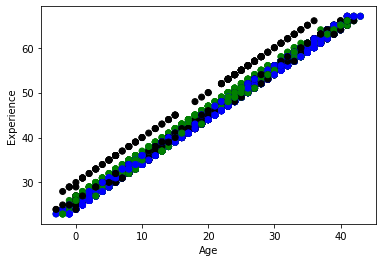

In [ ]:
# Plotting the correlation factor
fig, ax = plot.subplots()
colors = {1:'blue',2:'green',3:'black'}
ax.scatter(Data['Experience'],Data['Age'],c=Data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Age')
plot.ylabel('Experience')

###**The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level**

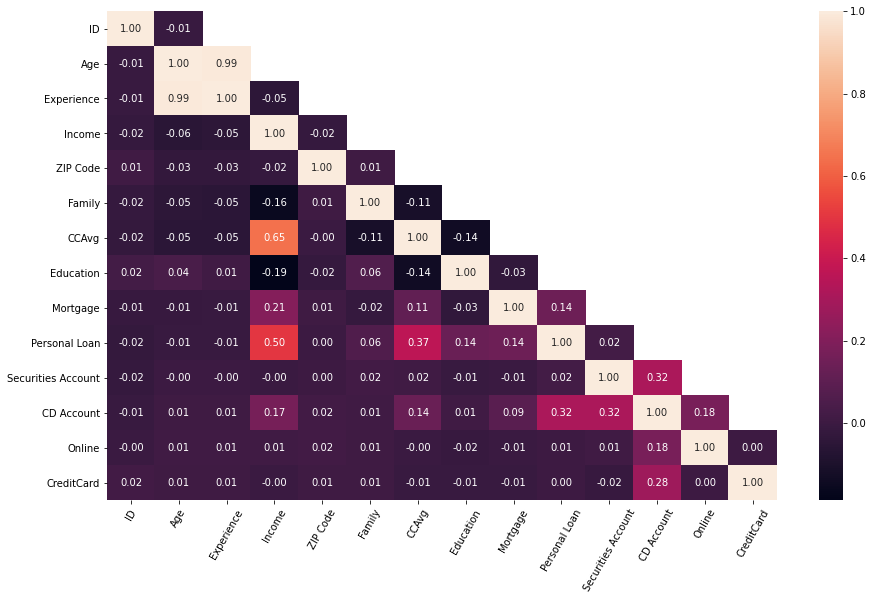

In [ ]:
# Correlation with heat map
corr = Data.corr()
sns.set_context(font_scale=2.0, rc={"lines.linewidth": 3.5})
plot.figure(figsize=(15,9))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 2)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

###**From above Plot it concludes:**
***Income and CCAvg is moderately correlated**

***Age and Experience is highly correlated**

In [ ]:
# Records with negative experience
Data[Data['Experience'] < 0]['Experience'].count()

52

### **There are 52 records with negative experience. Before proceeding any further we need to clean the same.**

In [ ]:
# Clean the negative variable
dfExp = Data.loc[Data['Experience'] >0]
negExp = Data.Experience < 0
column_name = 'Experience'
mylist = Data.loc[negExp]['ID'].tolist()             # Getting the customer ID who has negative experience

In [ ]:
# There are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
# Applying the median back to the location which had negative experience
for id in mylist:
    Age = Data.loc[np.where(Data['ID']==id)]["Age"].tolist()[0]
    education = Data.loc[np.where(Data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == Age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    Data.loc[Data.loc[np.where(Data['ID']==id)].index, 'Experience'] = exp

In [ ]:
# checking if there are records with negative experience
Data[Data['Experience'] < 0]['Experience'].count()

0

#**3. Exploratory Data Analysis**

###**Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.**

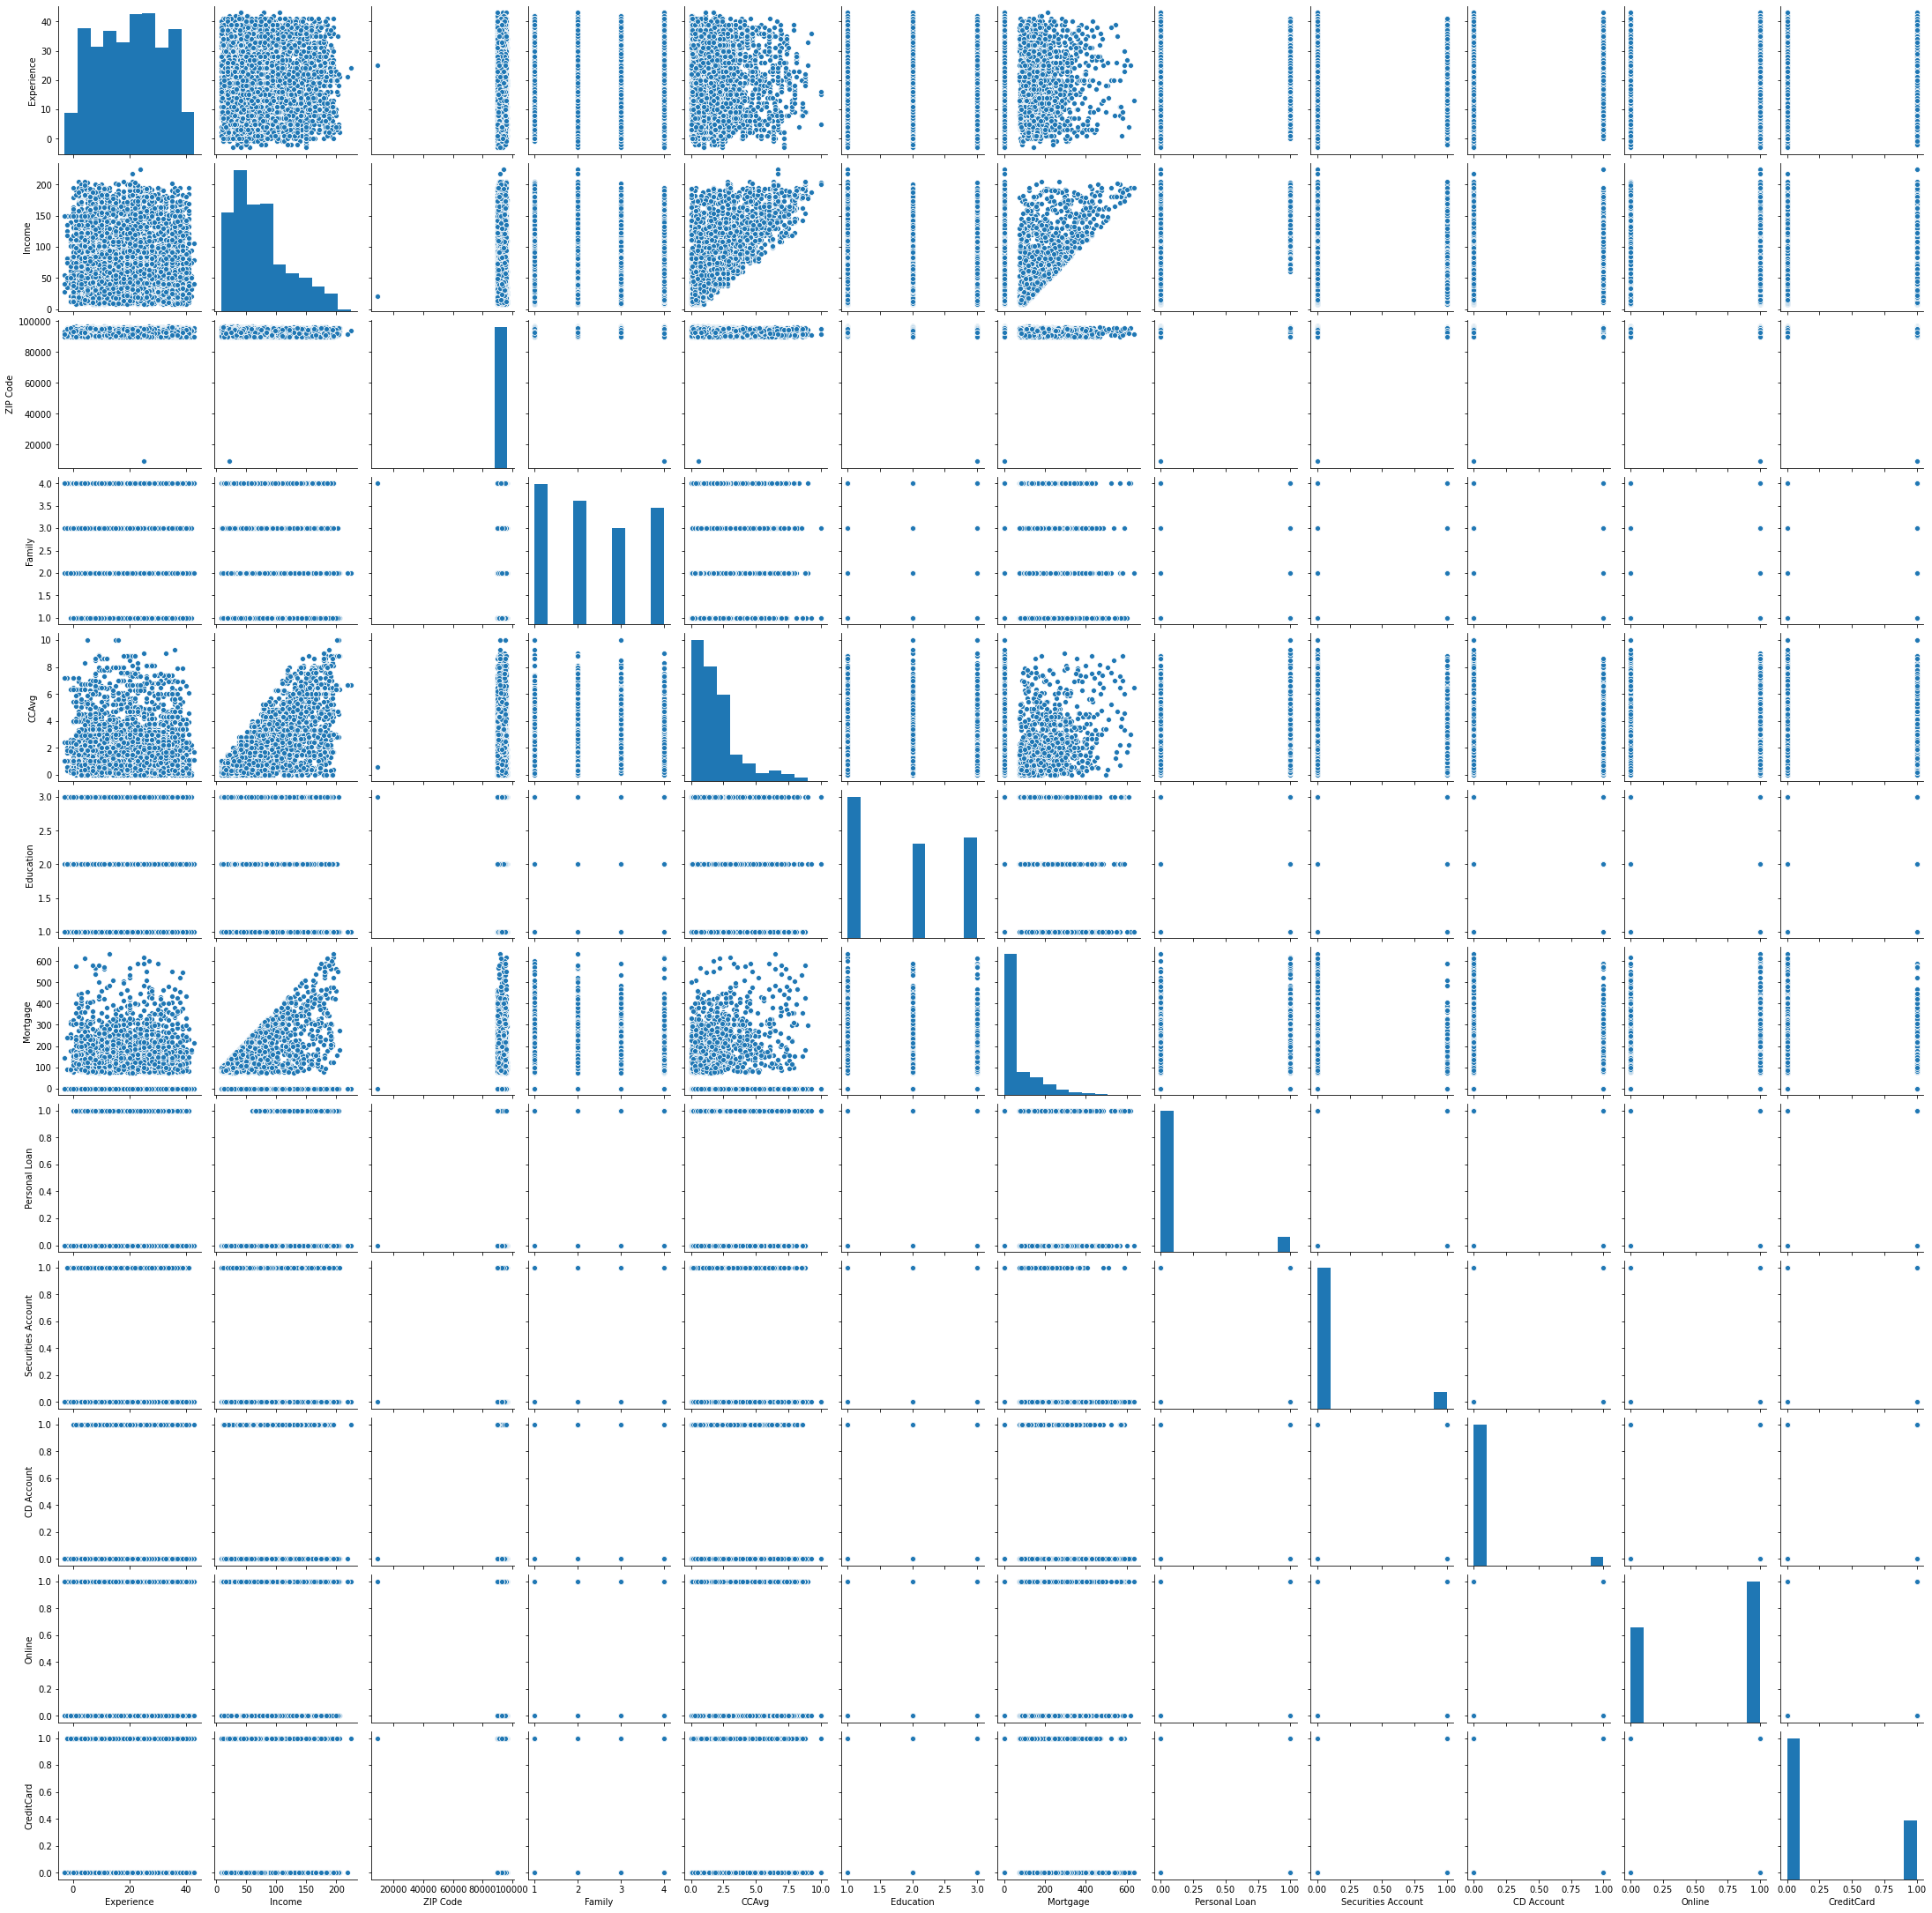

In [ ]:
sns.pairplot(Data.iloc[:,2:]);

###**1. Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
###**2. Experience** is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
###**3. Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
###**4. CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
###**5. Mortgage** 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
###The variables family and education are ordinal variables. The distribution of families is even.

##**3.1 Unique values**
###**The Unique Count measure gives the number of unique (distinct) values in a column**

In [ ]:
# Count of unique elements in each column
uniqueValues = Data.nunique()
uniqueValues

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
# Total number of unique count
uniqueValues = Data.nunique().sum()
uniqueValues

6190

##**3.2 Zero Mortgage Count**

In [ ]:
# Number of people with Zero Mortgage
Data['Mortgage'].isin([0]).sum()

3462

##**3.3 Zero Credit Card Spending**



In [ ]:
# Number of people with zero credit card spending per month
Data[Data['CCAvg'] ==0]['CCAvg'].count()

106

##**3.4 Value counts for all categorical columns**

In [ ]:
# value counts for all categorical fields
for col in ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Family']:
    print('\nColumn:', col)         
    print(Data[col].value_counts())


Column: Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Column: Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Column: Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

Column: CD Account
0    4698
1     302
Name: CD Account, dtype: int64

Column: Online
1    2984
0    2016
Name: Online, dtype: int64

Column: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

Column: Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


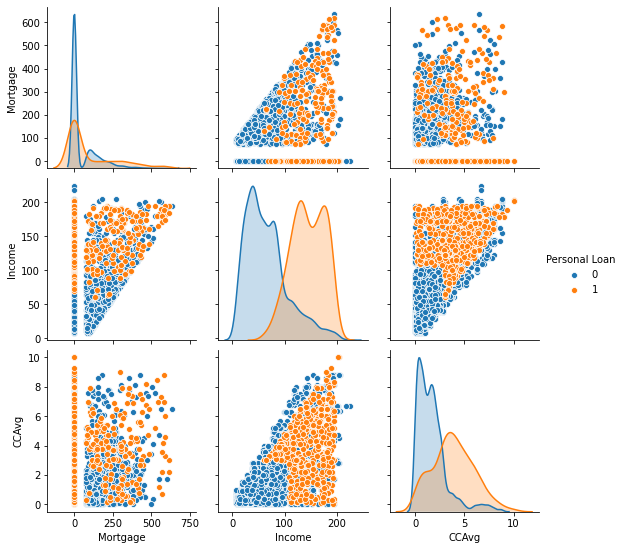

In [ ]:
sns.pairplot(Data[['Mortgage', 'Income', 'CCAvg', 'Personal Loan']], hue = 'Personal Loan',kind='scatter', diag_kind = 'kde');

##**3.5 Univariate analysis**

###**Univariate analysis** is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.
## **Points observed by Univariate Analysis**
***The data set got 0 missing cells.**

***It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’**

***It got 2 categorical variables: ‘Education’, ‘Family’**

***It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’**

***Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.**

***Also, Experience is highly correlated with Age (ρ = 0.994214857)**

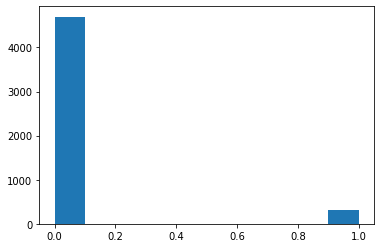

In [ ]:
#*94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
plot.hist(Data['CD Account'])
plot.show()

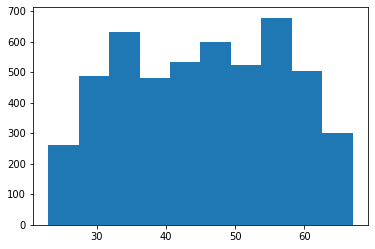

In [ ]:
#The mean age of the customers is 45 with standard deviation of 11.5. Also, the estimated average age in hypothesis testing is between 30–50. 
#The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical.
plot.hist(Data['Age'])
plot.show()

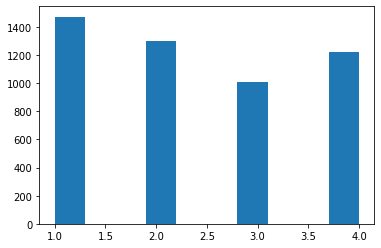

In [ ]:
#Around 29% of the customer’s family size is 1.
plot.hist(Data['Family'])
plot.show()

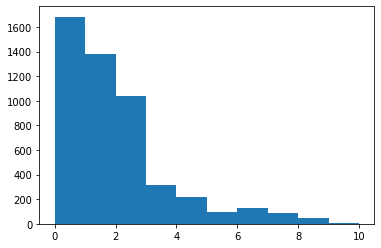

In [ ]:
#The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. 
#The curve is highly positive skewed (Skewness = 1.598443337)
plot.hist(Data['CCAvg'])
plot.show()

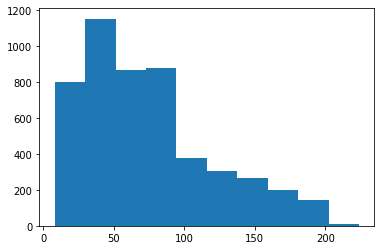

In [ ]:
#The mean annual income of the customer is 73.77 with standard deviation of 46. 
#The curve is moderately positive skewed (Skewness = 0.8413386073)
plot.hist(Data['Income'])
plot.show()

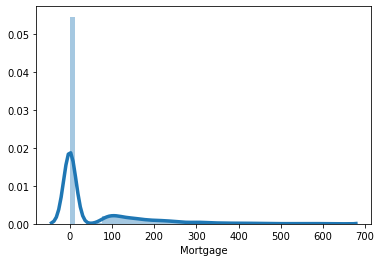

In [ ]:
#The mean value of house mortgage is 56.5 with standard deviation of 101.71. 
#The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)
sns.distplot(Data['Mortgage']);

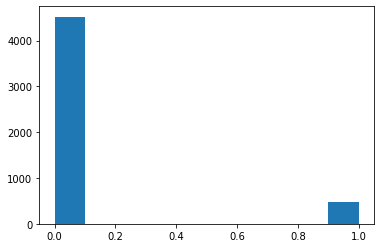

In [ ]:
# Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
plot.hist(Data['Personal Loan'])
plot.show()

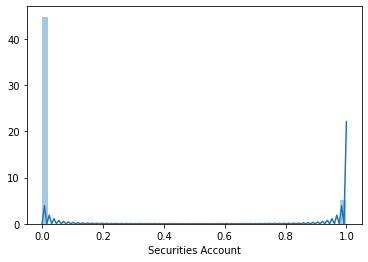

In [ ]:
# Around 90% of the customer doesn’t have a securities account with the bank.
sns.distplot(Data['Securities Account']);


###**Bivariate analysis** means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

###**a) Categorical Independent Variable vs Target Variable**

cross tabulation can be given as:  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation in percentages can be given as:  
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


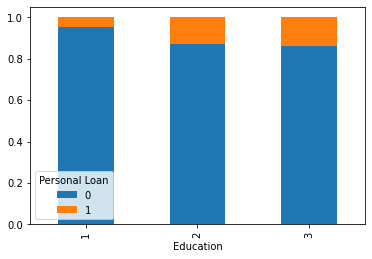

In [ ]:
# Customers who are more educated have a higher probability of buying personal loans
edu=pd.crosstab(Data['Education'],Data['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',edu)
print('cross tabulation in percentages can be given as: ','\n',edu.div(edu.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation in percentages can be given as:  
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


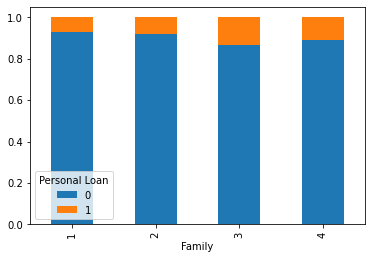

In [ ]:
# The number of family members not significantly affect probability
family=pd.crosstab(Data['Family'],Data['Personal Loan'])
family.div(family.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',family)
print('cross tabulation in percentages can be given as: ','\n',family.div(family.sum(1).astype(float),axis=0))

###**b) Boolean Independent Variable vs Target Variable**

cross tabulation can be given as:  
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140
cross tabulation in percentages can be given as:  
 Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


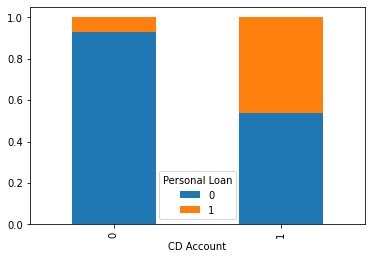

In [ ]:
# The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank
Cd_Account=pd.crosstab(Data['CD Account'],Data['Personal Loan'])
Cd_Account.div(Cd_Account.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',Cd_Account)
print('cross tabulation in percentages can be given as: ','\n',Cd_Account.div(Cd_Account.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation in percentages can be given as:  
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


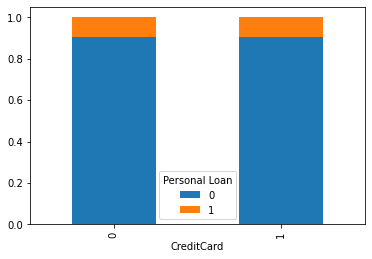

In [ ]:
# Around 71% of the customer doesn’t use a credit card issued by Universal Bank
# The customer who uses or doesn’t use a credit card issued by Universal Bank doesn’t seem to affect the probability of buying a personal loan
credit=pd.crosstab(Data['CreditCard'],Data['Personal Loan'])
credit.div(credit.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',credit)
print('cross tabulation in percentages can be given as: ','\n',credit.div(credit.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation in percentages can be given as:  
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


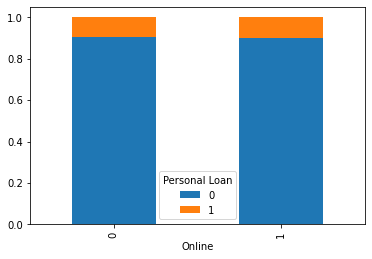

In [ ]:
# Around 60% of customers use internet banking facilities.
# The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans
online=pd.crosstab(Data['Online'],Data['Personal Loan'])
online.div(online.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',online)
print('cross tabulation in percentages can be given as: ','\n',online.div(online.sum(1).astype(float),axis=0))

cross tabulation can be given as:  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation in percentages can be given as:  
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


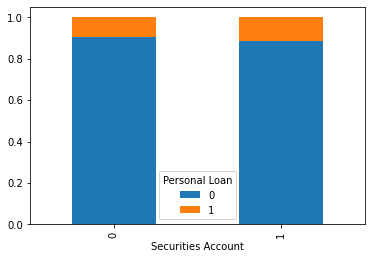

In [ ]:
# The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan
sec=pd.crosstab(Data['Securities Account'],Data['Personal Loan'])
sec.div(sec.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as: ','\n',sec)
print('cross tabulation in percentages can be given as: ','\n',sec.div(sec.sum(1).astype(float),axis=0))

###**c) Numerical Independent Variable vs Target Variable**

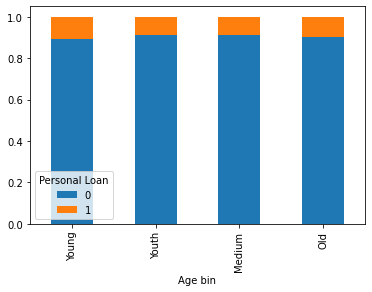

In [ ]:
bins=[22,36,48,58,70]
group=['Young','Youth','Medium','Old']
Data['Age bin']=pd.cut(Data['Age'],bins,labels=group)
age = pd.crosstab(Data['Age bin'],Data['Personal Loan'])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

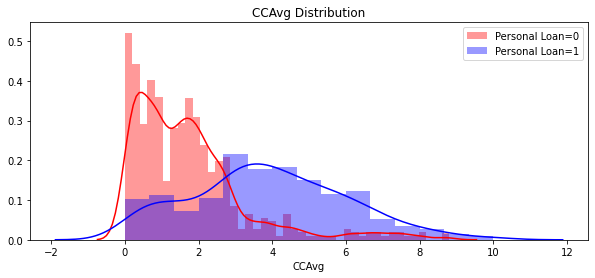

In [ ]:
# Applicants who spend more on credit cards are more viable to buy personal loans
plot.figure(figsize=(10,4))
sns.distplot(Data[Data["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(Data[Data["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plot.legend()
plot.title("CCAvg Distribution");

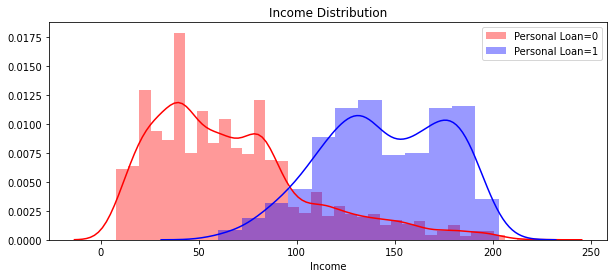

In [ ]:
# Customers with high incomes are more feasible to buy the personal loan 
plot.figure(figsize=(10,4))
sns.distplot(Data[Data["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(Data[Data["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plot.legend()
plot.title("Income Distribution");

##**Multivariate Analysis**

###**Multivariate data** analysis is a set of statistical models that examine patterns in multidimensional data by considering, at once, several data variables

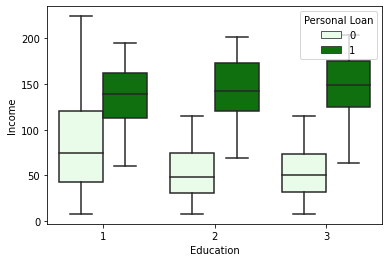

In [ ]:
# Customers whose education level is 1 is having more income.
# However customers who has taken the personal loan have the same income levels
f = (Data.loc[Data['Personal Loan'].isin([0, 1])].loc[:, ['Education', 'Income', 'Personal Loan']])
f = f[f["Education"] >= 1]
f = f[f["Education"] < 4]
f['Income'] = f['Income'].astype(float)
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=f,color='green');

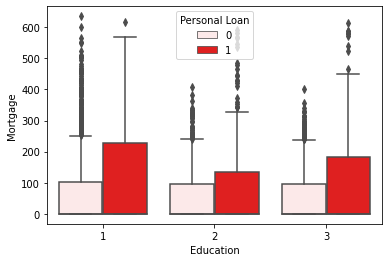

In [ ]:
f = (Data.loc[Data['Personal Loan'].isin([0, 1])].loc[:, ['Education', 'Mortgage', 'Personal Loan']])
f = f[f["Education"] >= 0]
f = f[f["Education"] < 4]
f['Mortgage'] = f['Mortgage'].astype(float)
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=f,color='red');

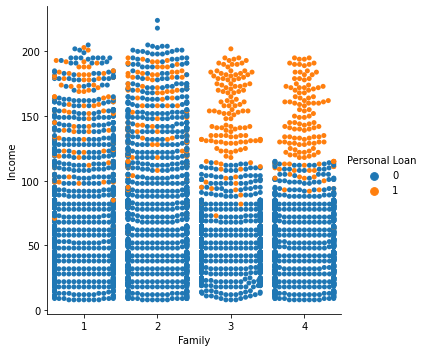

In [ ]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = Data, kind='swarm');

##**4. Transformation for the feature variables**

###**Outlier Treatment**
**Having outliers often has a significant effect on the mean and standard deviation hence affecting the distribution.**

**Due to these outliers’ bulk of the data in the Mortgage is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the Z-score.**

**The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.**


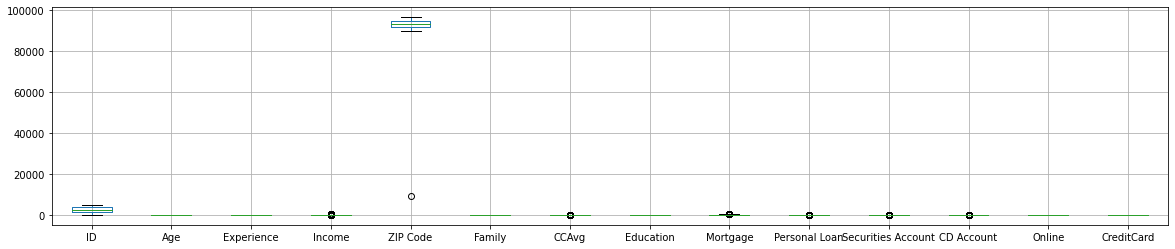

In [ ]:
# Mortgage has more number of outlier. Income, CCAvg have also outliers
Data.boxplot(return_type='axes', figsize=(20,4));

In [ ]:
# Dropped more than 100+ rows which contain outliers 

Data['mortgage']=np.abs(stats.zscore(Data['Mortgage']))
Data=Data[Data['mortgage']<3]
Data.drop('mortgage',axis=1,inplace=True)
Data.shape

(4895, 14)

##**Minmax scaler**

**x scaled = (x – xmin)/(xmax – xmin)**

In [ ]:
scaler = MinMaxScaler(feature_range=(5, 10))
Data_scaled = Data.copy()
col_names = ['Income', 'Age','CCAvg','Income','Mortgage','Experience','Education','CD Account','CreditCard','Online','Personal Loan','Securities Account']
features = Data_scaled[col_names]
Data_scaled[col_names] = scaler.fit_transform(features.values)
Data_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,5.227273,5.434783,5.949074,91107,4,5.80,5.0,5.000000,5.0,10.0,5.0,5.0,5.0
1,2,7.500000,7.391304,5.601852,90089,3,5.75,5.0,5.000000,5.0,10.0,5.0,5.0,5.0
2,3,6.818182,6.956522,5.069444,94720,1,5.50,5.0,5.000000,5.0,5.0,5.0,5.0,5.0
3,4,6.363636,6.304348,7.129630,94112,1,6.35,7.5,5.000000,5.0,5.0,5.0,5.0,5.0
4,5,6.363636,6.195652,5.856481,91330,4,5.50,7.5,5.000000,5.0,5.0,5.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5.681818,5.652174,5.740741,92697,1,5.95,10.0,5.000000,5.0,5.0,5.0,10.0,5.0
4996,4997,5.795455,5.760870,5.162037,92037,4,5.20,5.0,5.669291,5.0,5.0,5.0,10.0,5.0
4997,4998,9.545455,9.565217,5.370370,93023,2,5.15,10.0,5.000000,5.0,5.0,5.0,5.0,5.0
4998,4999,9.772727,9.673913,5.949074,90034,3,5.25,7.5,5.000000,5.0,5.0,5.0,10.0,5.0


##**Standard Scaler**

**x scaled = x – mean/std. dev.**

In [ ]:
scaler = StandardScaler()

Data_scaled[col_names] = scaler.fit_transform(features.values)
Data_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.774417,-1.666078,-0.538229,91107,4,-0.193371,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,2,-0.029524,-0.096330,-0.864109,90089,3,-0.250595,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,3,-0.552992,-0.445163,-1.363793,94720,1,-0.536720,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,4,-0.901970,-0.968413,0.569765,94112,1,0.436103,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,5,-0.901970,-1.055621,-0.625130,91330,4,-0.536720,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-1.425438,-1.491662,-0.733757,92697,1,-0.021696,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4996,4997,-1.338194,-1.404454,-1.276892,92037,4,-0.880069,-1.049078,0.280238,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4997,4998,1.540880,1.647835,-1.081363,93023,2,-0.937294,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4998,4999,1.715370,1.735043,-0.538229,90034,3,-0.822844,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314


##**MaxAbsScaler**



In [ ]:
scaler = MaxAbsScaler()

Data_scaled[col_names] = scaler.fit_transform(features.values)
Data_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.373134,0.023256,0.218750,91107,4,0.16,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0
1,2,0.671642,0.441860,0.151786,90089,3,0.15,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0
2,3,0.582090,0.348837,0.049107,94720,1,0.10,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0
3,4,0.522388,0.209302,0.446429,94112,1,0.27,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,0.522388,0.186047,0.200893,91330,4,0.10,0.666667,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.432836,0.069767,0.178571,92697,1,0.19,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
4996,4997,0.447761,0.093023,0.066964,92037,4,0.04,0.333333,0.133858,0.0,0.0,0.0,1.0,0.0
4997,4998,0.940299,0.906977,0.107143,93023,2,0.03,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4998,4999,0.970149,0.930233,0.218750,90034,3,0.05,0.666667,0.000000,0.0,0.0,0.0,1.0,0.0


In [ ]:
Data["Income"].max(), Data["Age"].max()

(224, 67)

##**Robust Scaler**

**IQR = Q3 – Q1**

**x scaled = (x – Q1)/(Q3 – Q1)**

In [ ]:
scaler = RobustScaler()

Data_scaled[col_names] = scaler.fit_transform(features.values)
Data_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,-1.00,-0.95,-0.254237,91107,4,0.055556,-0.5,0.000000,0.0,1.0,0.0,-1.0,0.0
1,2,0.00,-0.05,-0.508475,90089,3,0.000000,-0.5,0.000000,0.0,1.0,0.0,-1.0,0.0
2,3,-0.30,-0.25,-0.898305,94720,1,-0.277778,-0.5,0.000000,0.0,0.0,0.0,-1.0,0.0
3,4,-0.50,-0.55,0.610169,94112,1,0.666667,0.0,0.000000,0.0,0.0,0.0,-1.0,0.0
4,5,-0.50,-0.60,-0.322034,91330,4,-0.277778,0.0,0.000000,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-0.80,-0.85,-0.406780,92697,1,0.222222,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
4996,4997,-0.75,-0.80,-0.830508,92037,4,-0.611111,-0.5,0.841584,0.0,0.0,0.0,0.0,0.0
4997,4998,0.90,0.95,-0.677966,93023,2,-0.666667,0.5,0.000000,0.0,0.0,0.0,-1.0,0.0
4998,4999,1.00,1.00,-0.254237,90034,3,-0.555556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


##**Quantile Transformer Scaler**

In [ ]:
scaler = QuantileTransformer()

Data_scaled[col_names] = scaler.fit_transform(features.values)
Data_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.013013,0.031031,0.368869,91107,4,0.513013,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0
1,2,0.491491,0.465465,0.211211,90089,3,0.485485,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0
2,3,0.333834,0.361862,0.017017,94720,1,0.359860,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,4,0.239740,0.219219,0.756256,94112,1,0.780781,0.55956,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,0.239740,0.192693,0.347848,91330,4,0.359860,0.55956,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.085085,0.068068,0.270270,92697,1,0.601602,1.00000,0.000000,0.0,0.0,0.0,1.0,0.0
4996,4997,0.111111,0.092593,0.041542,92037,4,0.164665,0.00000,0.714715,0.0,0.0,0.0,1.0,0.0
4997,4998,0.950450,0.969469,0.117117,93023,2,0.122623,1.00000,0.000000,0.0,0.0,0.0,0.0,0.0
4998,4999,0.984985,0.983984,0.368869,90034,3,0.198699,0.55956,0.000000,0.0,0.0,0.0,1.0,0.0


##**Unit Vector Scaler/Normalizer**

In [ ]:
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

Data_scaled[col_names] = scaler.fit_transform(features.values)
Data_scaled

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.339186,0.013567,0.664804,91107,4,0.021708,0.013567,0.000000,0.0,0.013567,0.0,0.000000,0.000000
1,2,0.656235,0.277077,0.495822,90089,3,0.021875,0.014583,0.000000,0.0,0.014583,0.0,0.000000,0.000000
2,3,0.874255,0.336252,0.246585,94720,1,0.022417,0.022417,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,4,0.239719,0.061642,0.684911,94112,1,0.018493,0.013698,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,5,0.478734,0.109425,0.615515,91330,4,0.013678,0.027356,0.000000,0.0,0.000000,0.0,0.000000,0.013678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.454927,0.047061,0.627486,92697,1,0.029806,0.047061,0.000000,0.0,0.000000,0.0,0.015687,0.000000
4996,4997,0.323627,0.043150,0.161814,92037,4,0.004315,0.010788,0.916943,0.0,0.000000,0.0,0.010788,0.000000
4997,4998,0.772492,0.478209,0.294283,93023,2,0.003679,0.036785,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4998,4999,0.630378,0.387925,0.475208,90034,3,0.004849,0.019396,0.000000,0.0,0.000000,0.0,0.009698,0.000000


##**Custom Transformer**

In [ ]:
transformer = FunctionTransformer(np.log2, validate = True)

Data_scaled[col_names] = transformer.transform(features.values)
Data_scaled

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:165: RuntimeWarning: divide by zero encountered in log2
  return func(X, **(kw_args if kw_args else {}))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:165: RuntimeWarning: invalid value encountered in log2
  return func(X, **(kw_args if kw_args else {}))


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,4.643856,0.000000,5.614710,91107,4,0.678072,0.000000,-inf,-inf,0.0,-inf,-inf,-inf
1,2,5.491853,4.247928,5.087463,90089,3,0.584963,0.000000,-inf,-inf,0.0,-inf,-inf,-inf
2,3,5.285402,3.906891,3.459432,94720,1,0.000000,0.000000,-inf,-inf,-inf,-inf,-inf,-inf
3,4,5.129283,3.169925,6.643856,94112,1,1.432959,1.000000,-inf,-inf,-inf,-inf,-inf,-inf
4,5,5.129283,3.000000,5.491853,91330,4,0.000000,1.000000,-inf,-inf,-inf,-inf,-inf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,4.857981,1.584963,5.321928,92697,1,0.925999,1.584963,-inf,-inf,-inf,-inf,0.0,-inf
4996,4997,4.906891,2.000000,3.906891,92037,4,-1.321928,0.000000,6.409391,-inf,-inf,-inf,0.0,-inf
4997,4998,5.977280,5.285402,4.584963,93023,2,-1.736966,1.584963,-inf,-inf,-inf,-inf,-inf,-inf
4998,4999,6.022368,5.321928,5.614710,90034,3,-1.000000,1.000000,-inf,-inf,-inf,-inf,0.0,-inf


##**Model Building**

###**Dropping ID And ZIP Code**

In [8]:
Data = Data.drop(['ID','ZIP Code'], axis=1)
Data.head(4)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0


###**Creating two dataframes with 'Experience' and without 'Experience' repectively**

In [10]:
loan_with_experience = Data
loan_without_experience = Data.drop(['Experience'], axis=1)
print('Columns With Experience : ', loan_with_experience.columns)
print('Columns Without Experience : ', loan_without_experience.columns)

Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')
Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')


In [12]:
# Seperating Target Variable from Independent Variables from Experience and Without Experience dataframe
# From Experience Dataframe:
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]
# From Without Experience Dataframe:
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]

##**Splitting the data into train and test set in the ratio of 70:30 respectively**

In [13]:
# From Experience Dataframe:
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=2)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [14]:
# From Without Experience Dataframe:
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=2)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 10)
y train data (3500, 1)
x test data  (1500, 10)
y test data  (1500, 1)


#**Logistic Regression**

In [18]:
#With Experience Column

#X_Exp_train, X_Exp_test, y_Exp_train, y_Exp_test
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Predicting for test set
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



In [20]:
#Without Experience Column

#X_train, X_test, y_train, y_test
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

In [30]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Positive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Positive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Positive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Positive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])

Logistic Regression Model Accuracy Score W/O Experience : 0.936000
Logistic Regression Model Accuracy Score With Experience : 0.942000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1335   27]
 [  69   69]]

True Positive    =  69
True Negative     =  1335
False Positive     =  27
False Negative    =  69

Logistic Regression Confusion Matrix With Experience: 
 [[1341   21]
 [  66   72]]

True Positive    =  72
True Negative     =  1341
False Positive     =  21
False Negative    =  66


###**Accuracy is higher with 'Experience' (94.60 %) than without 'Experience' (94.26%)**

###**Customers who dont accept loan and the customers who accept loan is better with 'Experience'**

###**Type 1 (False Positive) and Type 2 (False Negative) errors is less with experience**

###**Hence we can imporove the accuracy by scalling the attributes**

##**Improvement of the model Iteration 2 For Logistic Regression with Experience**

In [31]:
#X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)


scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)


In [32]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Positive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Positive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_Expr_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,3))
print("precision of accepting Loan : ",round(p,3))
print("recall of accepting Loan    : ",round(r,3))
print("F1 score of accepting Loan  : ",round(f,3))

----------------------Final Analysis of Logistic Regression----------------------------

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.937333

After Scalling Logistic Regression Confusion Matrix With Experience: 
 [[1330   32]
 [  62   76]]

True Positive    =  76
True Negative     =  1330
False Positive     =  32
False Negative    =  62

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1362
           1       0.70      0.55      0.62       138

    accuracy                           0.94      1500
   macro avg       0.83      0.76      0.79      1500
weighted avg       0.93      0.94      0.93      1500

Accuracy of accepting Loan  :  0.937
precision of accepting Loan :  0.704
recall of accepting Loan    :  0.551
F1 score of accepting Loan  :  0.618


##**K-NN**

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9213333333333333, 0.9206666666666666, 0.912, 0.9126666666666666, 0.916, 0.914, 0.914, 0.9093333333333333, 0.9113333333333333, 0.9046666666666666]

Misclassification error :
 [0.07866666666666666, 0.07933333333333337, 0.08799999999999997, 0.08733333333333337, 0.08399999999999996, 0.08599999999999997, 0.08599999999999997, 0.09066666666666667, 0.08866666666666667, 0.09533333333333338]

The optimal number of neighbor is k= 1


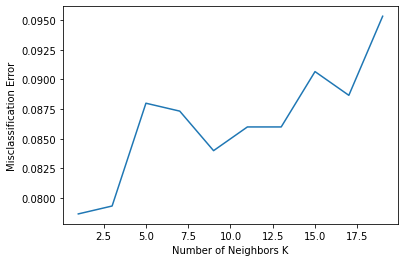

In [34]:
#Creating number list from range 1 to 20 of K for KNN

numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declaring a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())               
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plot.plot(neighbors, MSE)
plot.xlabel('Number of Neighbors K')
plot.ylabel('Misclassification Error')
plot.show()

**Misclassification error is minimum at k = 3**

**Hence Considering 3 is the optimal k. When k=3 the model accuracy is 0.909**

**From above graph of misclassification error vs k (with k value on X-axis) we can also see that error is very low when K is 3**

In [35]:
# Model building using 'Without Experience' dataframe

# instantiating learning model (optimal_k = 3)
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_y_predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predicted)

In [36]:
# Model building using 'With Experience' dataframe

# instantiating learning model (optimal_k = 3)
knn_model_expr = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_expr.fit(X_Expr_train, y_Expr_train)
knn_expr_y_predicted = knn_model_expr.predict(X_Expr_test)
knn_expr_score = knn_model_expr.score(X_Expr_test, y_Expr_test)
knn_expr_accuracy = accuracy_score(y_Expr_test, knn_expr_y_predicted)
knn_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, knn_expr_y_predicted)

In [37]:
# Comparison 
print('K-NN Model Accuracy Score W/O Experience  : %f'  % knn_accuracy)
print('K-NN Model Accuracy Score With Experience : %f'  % knn_expr_accuracy)

# Confusion Matrix
print('\nK-NN Confusion Matrix W/O Experience: \n', knn_confusion_matrix)
print('\nTrue Positive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Positive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_expr)
print('\nTrue Positive    = ', knn_confusion_matrix_expr[1][1])
print('True Negative     = ',   knn_confusion_matrix_expr[0][0])
print('False Positive     = ',   knn_confusion_matrix_expr[0][1])
print('False Negative    = ',   knn_confusion_matrix_expr[1][0])

K-NN Model Accuracy Score W/O Experience  : 0.921333
K-NN Model Accuracy Score With Experience : 0.914000

K-NN Confusion Matrix W/O Experience: 
 [[1314   48]
 [  70   68]]

True Positive    =  68
True Negative     =  1314
False Positive     =  48
False Negative    =  70

K-NN Confusion Matrix With Experience: 
 [[1308   54]
 [  75   63]]

True Positive    =  63
True Negative     =  1308
False Positive     =  54
False Negative    =  75


###**Accuracy is higher at 'Without Experience' (90.93%) than with 'Experience' (90.20%)**

###**Also from the above confusion matrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better at 'without Experience'**

###**Type 1 (False Positive) and Type 2(False Negative) errors is less at without Experience**

##**Improvement of the model**

In [38]:
#X_train, X_test, y_train, y_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

In [39]:
print('----------------------Final Analysis of K-NN----------------------------\n')
print('After Scalling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scalling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Positive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Positive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of K-NN----------------------------

After Scalling K-NN Model Accuracy Score without Experience: 0.961333

After Scalling K-NN Confusion Matrix Without Experience: 
 [[1345   17]
 [  41   97]]

True Positive    =  97
True Negative     =  1345
False Positive     =  17
False Negative    =  41

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.85      0.70      0.77       138

    accuracy                           0.96      1500
   macro avg       0.91      0.85      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Accuracy of accepting Loan  :  0.96
precision of accepting Loan :  0.85
recall of accepting Loan    :  0.7
F1 score of accepting Loan  :  0.77


##**Naïve Bayes**

In [40]:
# Model building using 'Without Experience' dataframe

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_predicted = gnb_model.predict(X_test)
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)

In [41]:
# Model building using 'With Experience' dataframe

gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_Expr_train, y_Expr_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_Expr_test)
gnb_expr_score = gnb_expr_model.score(X_Expr_test, y_Expr_test)
gnb_expr_accuracy = accuracy_score(y_Expr_test, gnb_expr_y_predicted)
gnb_expr_confusion_matrix = metrics.confusion_matrix(y_Expr_test, gnb_expr_y_predicted)

In [42]:
# Comparison 
print('Naïve Bayes Model Accuracy Score W/O Experience  : %f'  % gnb_accuracy)
print('Naïve Bayes Model Accuracy Score With Experience : %f'  % gnb_expr_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix W/O Experience: \n', gnb_confusion_matrix)
print('\nTrue Positive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Positive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\nNaïve Bayes Confusion Matrix With Experience: \n', gnb_expr_confusion_matrix)
print('\nTrue Positive    = ', gnb_expr_confusion_matrix[1][1])
print('True Negative     = ',   gnb_expr_confusion_matrix[0][0])
print('False Positive     = ',   gnb_expr_confusion_matrix[0][1])
print('False Negative    = ',   gnb_expr_confusion_matrix[1][0])

Naïve Bayes Model Accuracy Score W/O Experience  : 0.890000
Naïve Bayes Model Accuracy Score With Experience : 0.890667

Naïve Bayes Confusion Matrix W/O Experience: 
 [[1264   98]
 [  67   71]]

True Positive    =  71
True Negative     =  1264
False Positive     =  98
False Negative    =  67

Naïve Bayes Confusion Matrix With Experience: 
 [[1264   98]
 [  66   72]]

True Positive    =  72
True Negative     =  1264
False Positive     =  98
False Negative    =  66


**Accuracy is almost at 'Without Experience' and with 'Experience'**

**Also customers who dont accept loan and the customers who accept loan is almost same at 'without Experience'**

**Type I (False Positive) and Type II(False Negative) errors is same**

In [43]:
# Improvement of the model 
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

In [44]:
print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scalling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Positive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Positive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

----------------------Final Analysis of Naïve Bayes----------------------------

After Scalling Naïve Bayes Model Accuracy Score: 0.884667

After Scalling Naïve Bayes Confusion Matrix: 
 [[1251  111]
 [  62   76]]

True Positive    =  76
True Negative     =  1251
False Positive     =  111
False Negative    =  62

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.42      0.51      0.46       138

    accuracy                           0.89      1500
   macro avg       0.68      0.72      0.70      1500
weighted avg       0.90      0.89      0.89      1500


Accuracy of accepting Loan   :  0.87
precision of accepting Loan  :  0.41
recall of accepting Loan     :  0.55
F1 score of accepting Loan   :  0.47


#**COMPARISON OF ABOVE THREE MODELS**

Overall Model Accuracy After scaling:

Logistic Regression : 94%
K-Nearest Neighbors : 96%
Naive Bayes         : 88%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1330   32]
 [  62   76]]

     True Positive    =  76
     True Negative     =  1330
     False Positive     =  32
     False Negative    =  62

K-Nearest Neighbors: 
 [[1345   17]
 [  41   97]]

    True Positive    =  97
    True Negative     =  1345
    False Positive     =  17
    False Negative    =  41

Naive Bayes: 
 [[1251  111]
 [  62   76]]

    True Positive    =  76
    True Negative     =  1251
    False Positive     =  111
    False Negative    =  62

Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.

If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


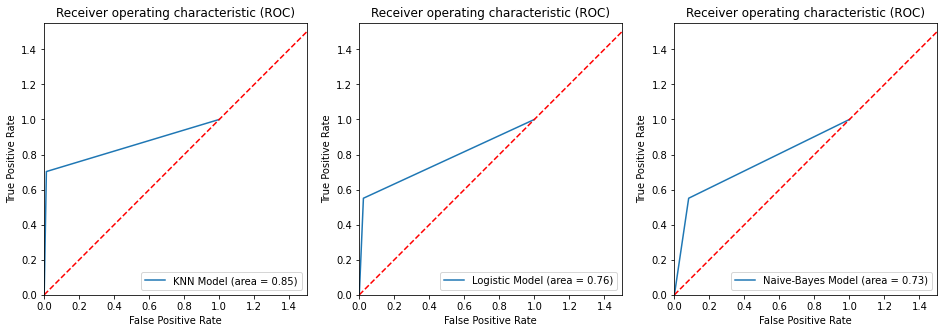

In [62]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Positive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Positive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Positive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Positive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Positive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Positive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.')
print('\nIf area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plot.figure(figsize=(16,5))
fig1_graph.add_subplot(1,3,1)
plot.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plot.plot([0, 1.5], [0, 1.5],'r--')
plot.xlim([0.0, 1.5])
plot.ylim([0.0, 1.55])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic (ROC)')
plot.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plot.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plot.plot([0, 1.5], [0, 1.5],'r--')
plot.xlim([0.0, 1.5])
plot.ylim([0.0, 1.55])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic (ROC)')
plot.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plot.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plot.plot([0, 1.5], [0, 1.5],'r--')
plot.xlim([0.0, 1.5])
plot.ylim([0.0, 1.55])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver operating characteristic (ROC)')
plot.legend(loc="lower right")
plot.show()

##**Final Conclusion to Predict the best Model**

**1. From the above, we can clearly see that k-Nearest Neighbors Alogorithm with scaled data gives us best accuracy of 96%.**

**2. Also the Type I(False Positive) and Type II(False Negative) errors are least in K-Nearest model.**

**3. The area in ROC curve for K-NN is 0.82 which is close to 1 which stats that K-NN is the best model in comparesion of Logistic Model and Naive-Bayes Model whose ROC area is 0.79 and 0.73 repectively.**

**4. Hence among the above three algorithm applied on the underline dataset, *K-NN* would be the best choice to predict the customers who will accept the personal loan.**
